In [1]:
# load  the  MCAS data from the  excel spreadsheet and import libraries 
%matplotlib inline
import numpy as np 
import  pandas as  pd 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy  import array
from sklearn import linear_model# to implemenyt linear regression 
from sklearn import metrics # to  evaluate model  performance 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split#  to  create train and test sets 
from sklearn.base import TransformerMixin # used for  the  encoding of  categorical variables by the  median in the respective array 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score#for metrics
from sklearn.externals import joblib#persists the model afrer getting trained 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import *

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nbuser/anaconda3_420/lib/pyth

In [2]:

#reading the 18.19 results  for MCAS performance 
MCAS_1819=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="18.19 MCAS")

display(MCAS_1819)
# reading the unique  id that defines students in the MCAS
student_and_sas=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="Student ID and SASIDs")
display(student_and_sas)

,adminyear,sprp_dis_name,sprp_sch_name,testschoolname,sasid,grade,gradesims,gender,race,yrsinmass,...,msgp2016,msgp2017,msgp2018,ecss2020,mcss2020,scss2020,summarize,amend,datachanged,uniqueID
0,2019,Watertown,Cunniff,Cunniff,1047531036,3,3,M,H,3,...,,,,471,473,,1,,,1047531036
1,2019,Watertown,Cunniff,Cunniff,1033412130,3,3,F,H,4,...,,,,502,487,,1,,,1033412130
2,2019,Watertown,Cunniff,Cunniff,1044531033,3,3,M,W,3,...,,,,508,541,,1,,,1044531033
3,2019,Watertown,Cunniff,Cunniff,1002531036,3,3,F,H,3,...,,,,474,492,,1,,,1002531036
4,2019,Watertown,Cunniff,Cunniff,1030211831,3,3,F,W,4,...,,,,510,509,,1,,,1030211831
5,2019,Watertown,Cunniff,Cunniff,1097400644,3,3,F,H,1,...,,,,,,,1,,,1097400644
6,2019,Watertown,Cunniff,Cunniff,1077532031,3,3,F,H,4,...,,,,508,492,,1,,,1077532031
7,2019,Watertown,Cunniff,Cunniff,1026531033,3,3,F,W,3,...,,,,499,522,,1,,,1026531033
8,2019,Watertown,Cunniff,Cunniff,1072794925,3,3,M,W,4,...,,,,474,477,,1,,,1072794925
9,2019,Watertown,Cunniff,Cunniff,1081211837,3,3,M,W,4,...,,,,495,473,,1,,,1081211837


,Student Number,SASID
0,301130,1.015487e+09
1,303526,1.011108e+09
2,350881,1.068300e+09
3,304145,1.000527e+09
4,302594,1.085606e+09
5,350446,1.046966e+09
6,305261,1.054221e+09
7,350490,1.001967e+09
8,301032,1.003761e+09
9,302190,1.039792e+09


In [3]:
student_and_sas=student_and_sas.rename(columns={"Student Number": "Student ID"})

In [4]:
# checking the sasid and student id so that race and ecodis  fom 18.19 sheet can be imported to the  math-i-ready dataset 

In [5]:
display(student_and_sas)

,Student ID,SASID
0,301130,1.015487e+09
1,303526,1.011108e+09
2,350881,1.068300e+09
3,304145,1.000527e+09
4,302594,1.085606e+09
5,350446,1.046966e+09
6,305261,1.054221e+09
7,350490,1.001967e+09
8,301032,1.003761e+09
9,302190,1.039792e+09


In [6]:
MCAS_1819=MCAS_1819.rename(columns={"sasid": "SASID"})

In [7]:
# getting the data mergerd  so that race and and the economic disadvantage features can be bought to the score dataset in order to comprehend if these factors effect score at all 
MCAS_1819_merged = pd.merge(MCAS_1819,
                 student_and_sas[['SASID','Student ID']],
                 on='SASID', 
                how='left')
display(MCAS_1819_merged)

,adminyear,sprp_dis_name,sprp_sch_name,testschoolname,SASID,grade,gradesims,gender,race,yrsinmass,...,msgp2017,msgp2018,ecss2020,mcss2020,scss2020,summarize,amend,datachanged,uniqueID,Student ID
0,2019,Watertown,Cunniff,Cunniff,1047531036,3,3,M,H,3,...,,,471,473,,1,,,1047531036,305309.0
1,2019,Watertown,Cunniff,Cunniff,1033412130,3,3,F,H,4,...,,,502,487,,1,,,1033412130,305641.0
2,2019,Watertown,Cunniff,Cunniff,1044531033,3,3,M,W,3,...,,,508,541,,1,,,1044531033,305310.0
3,2019,Watertown,Cunniff,Cunniff,1002531036,3,3,F,H,3,...,,,474,492,,1,,,1002531036,305351.0
4,2019,Watertown,Cunniff,Cunniff,1030211831,3,3,F,W,4,...,,,510,509,,1,,,1030211831,304974.0
5,2019,Watertown,Cunniff,Cunniff,1097400644,3,3,F,H,1,...,,,,,,1,,,1097400644,NaN
6,2019,Watertown,Cunniff,Cunniff,1077532031,3,3,F,H,4,...,,,508,492,,1,,,1077532031,305436.0
7,2019,Watertown,Cunniff,Cunniff,1026531033,3,3,F,W,3,...,,,499,522,,1,,,1026531033,305313.0
8,2019,Watertown,Cunniff,Cunniff,1072794925,3,3,M,W,4,...,,,474,477,,1,,,1072794925,304684.0
9,2019,Watertown,Cunniff,Cunniff,1081211837,3,3,M,W,4,...,,,495,473,,1,,,1081211837,304975.0


In [8]:
#The main MCAS ELA file 
math_I_Ready_df=pd.read_excel("AcademicPerformanceData MCAS Iready Grades for NU(1).xlsx",sheetname="math I-Ready ")


In [9]:
result_math = pd.merge(math_I_Ready_df,
                 MCAS_1819_merged[['Student ID','race','ecodis']],
                 on='Student ID', 
                how='left')

In [10]:
display(result_math)
result_math.shape

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,Race,English Language Learner,Special Education,...,Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent),Diagnostic: Measurement and Data Scale Score (Most Recent),Diagnostic: Measurement and Data Placement (Most Recent),Diagnostic: Measurement and Data Relative Placement (Most Recent),Diagnostic: Geometry Scale Score (Most Recent),Diagnostic: Geometry Placement (Most Recent),Diagnostic: Geometry Relative Placement (Most Recent),Diagnostic: Rush Flag (see Student Profile) (1),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,NaN,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Math,female,N,NaN,N,N,...,1 Level Below,NaN,Tested Out,On Level,507.0,Level 8,1 Level Below,NaN,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,NaN,N,Y,...,2 or More Levels Below,442.0,Level 3,2 or More Levels Below,449.0,Level 3,2 or More Levels Below,NaN,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,NaN,N,Y,...,1 Level Below,486.0,Level 6,2 or More Levels Below,508.0,Level 7,1 Level Below,NaN,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Math,male,N,NaN,N,N,...,On Level,451.0,Mid 2,On Level,424.0,Early 2,On Level,NaN,NaN,NaN
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,NaN,N,Y,...,On Level,518.0,Early 8,On Level,529.0,Early 8,On Level,NaN,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,NaN,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,NaN,Y,N,...,On Level,576.0,Level 8,Above Level,492.0,Level 6,1 Level Below,NaN,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Math,male,N,NaN,N,N,...,On Level,530.0,Late 5,On Level,513.0,Mid 5,On Level,NaN,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Math,female,N,NaN,N,Y,...,2 or More Levels Below,421.0,Level 2,2 or More Levels Below,441.0,Level 3,1 Level Below,NaN,B,0.0


(2506, 31)

In [11]:
result_math=result_math.drop(['Race','Economically Disadvantaged'],axis=1)

In [12]:
#printing column names 
for col in result_math.columns: 
    print(col) 


Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Diagnostic: Overall Relative Placement (Most Recent)
Diagnostic: Phonological Awareness Scale Score (Most Recent)
Diagnostic: Phonological Awareness Placement (Most Recent)
Diagnostic: Phonological Awareness Relative Placement (Most Recent)
Diagnostic: Phonics Scale Score (Most Recent)
Diagnostic: Phonics Placement (Most Recent)
Diagnostic: Phonics Relative Placement (Most Recent)
Diagnostic: High-Frequency Words Scale Score (Most Recent)
Diagnostic: High-Frequency Words Placement (Most Recent)
Diagnostic: High-Frequency Words Relative Placement (Most Recent)
Diagnostic: Vocabulary Scale Score (Most Recent)
Diagnostic: Vocabulary Placement (Most Recent)
Diagnostic: Vocabulary Relative Pl

In [12]:
result_math.isnull().sum()

Student ID                                                                        0
Student Grade                                                                     0
Academic Year                                                                     0
School                                                                            0
Subject                                                                           0
Gender                                                                            0
Hispanic or Latino                                                                0
English Language Learner                                                          0
Special Education                                                                 0
Number of Diagnostics Completed during the time frame                             0
Diagnostic: Overall Scale Score (Most Recent)                                   770
Diagnostic: Overall Placement (Most Recent)                                 

In [13]:
#printing column names 
for col in result_math.columns: 
    print(col) 

Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Performance level
Diagnostic: Number and Operations Scale Score (Most Recent)
Diagnostic: Number and Operations Placement (Most Recent)
Diagnostic: Number and Operations Relative Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent)
Diagnostic: Measurement and Data Scale Score (Most Recent)
Diagnostic: Measurement and Data Placement (Most Recent)
Diagnostic: Measurement and Data Relative Placement (Most Recent)
Diagnostic: Geometry Scale Score (Most Recent)
Diagnostic: Geometry Placement (Most Recent)
Diagnos

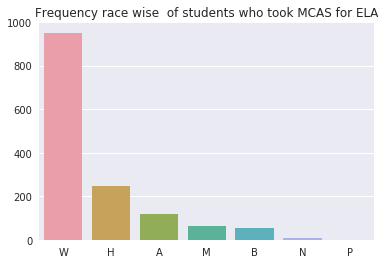

In [14]:
#finding out which  race was invested in taking the mcas the most 
race_count = result_math['race'].value_counts()
sns.set(style="darkgrid")
sns.barplot(race_count.index, race_count.values, alpha=0.9)
plt.title('Frequency race wise  of students who took MCAS for ELA')

plt.show()

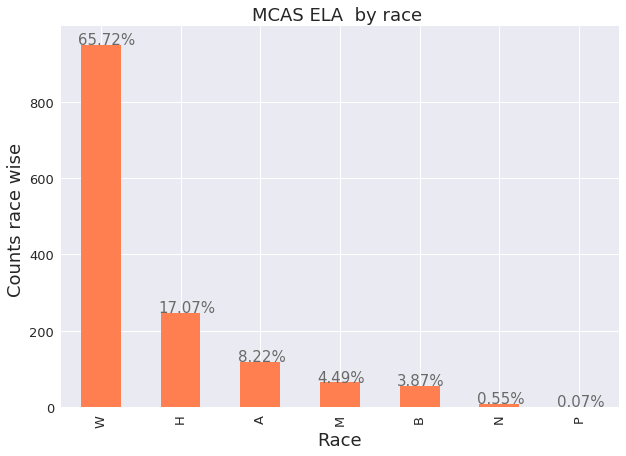

In [15]:
ax = result_math['race'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("MCAS ELA  by race ", fontsize=18)
ax.set_ylabel("Counts race wise ", fontsize=18);
ax.set_xlabel("Race", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

In [16]:
result_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 29 columns):
Student ID                                                                     2506 non-null int64
Student Grade                                                                  2506 non-null object
Academic Year                                                                  2506 non-null object
School                                                                         2506 non-null object
Subject                                                                        2506 non-null object
Gender                                                                         2506 non-null object
Hispanic or Latino                                                             2506 non-null object
English Language Learner                                                       2506 non-null object
Special Education                                                              2506 non-null o

In [18]:
result_math_lc = result_math.copy()

In [19]:
display(result_math_lc)

result_math_lc.isnull().sum()

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent),Diagnostic: Measurement and Data Scale Score (Most Recent),Diagnostic: Measurement and Data Placement (Most Recent),Diagnostic: Measurement and Data Relative Placement (Most Recent),Diagnostic: Geometry Scale Score (Most Recent),Diagnostic: Geometry Placement (Most Recent),Diagnostic: Geometry Relative Placement (Most Recent),Diagnostic: Rush Flag (see Student Profile) (1),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Math,female,N,N,N,1,...,1 Level Below,NaN,Tested Out,On Level,507.0,Level 8,1 Level Below,NaN,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,442.0,Level 3,2 or More Levels Below,449.0,Level 3,2 or More Levels Below,NaN,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,1 Level Below,486.0,Level 6,2 or More Levels Below,508.0,Level 7,1 Level Below,NaN,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Math,male,N,N,N,1,...,On Level,451.0,Mid 2,On Level,424.0,Early 2,On Level,NaN,NaN,NaN
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,On Level,518.0,Early 8,On Level,529.0,Early 8,On Level,NaN,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,Y,N,1,...,On Level,576.0,Level 8,Above Level,492.0,Level 6,1 Level Below,NaN,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Math,male,N,N,N,1,...,On Level,530.0,Late 5,On Level,513.0,Mid 5,On Level,NaN,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,421.0,Level 2,2 or More Levels Below,441.0,Level 3,1 Level Below,NaN,B,0.0


Student ID                                                                        0
Student Grade                                                                     0
Academic Year                                                                     0
School                                                                            0
Subject                                                                           0
Gender                                                                            0
Hispanic or Latino                                                                0
English Language Learner                                                          0
Special Education                                                                 0
Number of Diagnostics Completed during the time frame                             0
Diagnostic: Overall Scale Score (Most Recent)                                   770
Diagnostic: Overall Placement (Most Recent)                                 

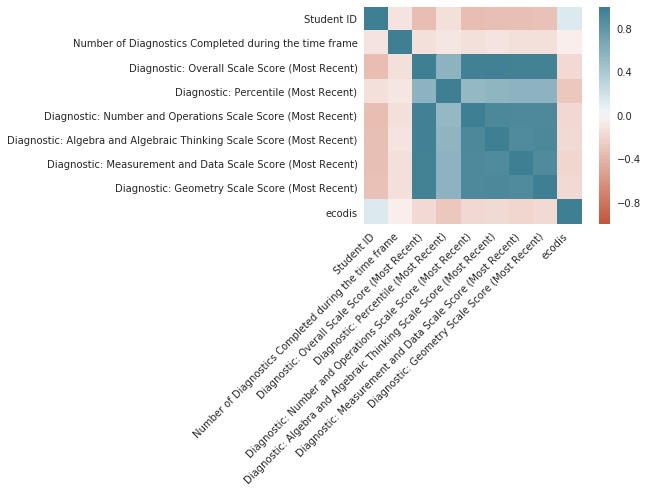

In [20]:
#corr plot with all columns and the null values after  merging the data set 
corr_math = result_math_lc.corr()
ax = sns.heatmap(
    corr_math, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

result_literacy_lc.isnull().sum()

needed to deal with the null values which are categorical they cannot be filled up with  mean and hence i have created a data frame imputer class that tranforms the null values and get them replaced
along with  frequently occuring values 

In [21]:
# needed to deal with the null values which are categorical they cannot be filled up with  mean and hence i have created a data frame imputer class that tranforms the null values and get them replaced
#along with  frequently occuring values 
class DataFrameImputer(TransformerMixin):

    def __init__(self):

        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 

        in column.

        Columns of other types are imputed with mean of column.

        """

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]

            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],

            index=X.columns)

        return self

    def transform(self, X, y=None):

        return X.fillna(self.fill)


X = pd.DataFrame(result_math_lc)

xt = DataFrameImputer().fit_transform(X)

print('before...')

print(X)

print('after...')

display(xt)

before...
      Student ID Student Grade Academic Year                        School  \
0         301130            11     2018-2019         WATERTOWN HIGH SCHOOL   
1         303526             9     2018-2019         WATERTOWN HIGH SCHOOL   
2         304145             6     2018-2019       WATERTOWN MIDDLE SCHOOL   
3         302594             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
4         305261             2     2018-2019  JAMES RUSSEL LOWELL ELEM SCH   
5         302190             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
6         302462            11     2018-2019         WATERTOWN HIGH SCHOOL   
7         350513             7     2018-2019       WATERTOWN MIDDLE SCHOOL   
8         350506             5     2018-2019     CUNNIFF ELEMENTARY SCHOOL   
9         305014             4     2018-2019      HOSMER ELEMENTARY SCHOOL   
10        303030             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
11        350244             1     2018-2019      HOSM

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent),Diagnostic: Measurement and Data Scale Score (Most Recent),Diagnostic: Measurement and Data Placement (Most Recent),Diagnostic: Measurement and Data Relative Placement (Most Recent),Diagnostic: Geometry Scale Score (Most Recent),Diagnostic: Geometry Placement (Most Recent),Diagnostic: Geometry Relative Placement (Most Recent),Diagnostic: Rush Flag (see Student Profile) (1),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,On Level,455.0,Level K,On Level,460.0,Level K,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Math,female,N,N,N,1,...,1 Level Below,455.0,Tested Out,On Level,507.0,Level 8,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,442.0,Level 3,2 or More Levels Below,449.0,Level 3,2 or More Levels Below,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,1 Level Below,486.0,Level 6,2 or More Levels Below,508.0,Level 7,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Math,male,N,N,N,1,...,On Level,451.0,Mid 2,On Level,424.0,Early 2,On Level,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,On Level,518.0,Early 8,On Level,529.0,Early 8,On Level,Yellow Rush Flag: avg. < 21 seconds/item,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,On Level,455.0,Level K,On Level,460.0,Level K,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,Y,N,1,...,On Level,576.0,Level 8,Above Level,492.0,Level 6,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Math,male,N,N,N,1,...,On Level,530.0,Late 5,On Level,513.0,Mid 5,On Level,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,421.0,Level 2,2 or More Levels Below,441.0,Level 3,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,B,0.0


In [22]:
display(xt)

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Vocabulary Placement (Most Recent),Diagnostic: Vocabulary Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Scale Score (Most Recent),Diagnostic: Reading Comprehension: Literature Placement (Most Recent),Diagnostic: Reading Comprehension: Literature Relative Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Scale Score (Most Recent),Diagnostic: Reading Comprehension: Informational Text Placement (Most Recent),Diagnostic: Reading Comprehension: Informational Text Relative Placement (Most Recent),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Reading,female,N,N,N,1,...,Early 9,On Level,658.0,Early 9,On Level,626.0,Level 8,1 Level Below,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,N,Y,1,...,Level 3,2 or More Levels Below,501.0,Level 3,2 or More Levels Below,513.0,Level 3,2 or More Levels Below,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Level 5,2 or More Levels Below,557.0,Level 4,2 or More Levels Below,591.0,Level 6,2 or More Levels Below,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Reading,male,N,N,N,1,...,Mid 2,On Level,511.0,Early 2,On Level,546.0,Late 2,On Level,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,male,N,N,Y,1,...,Late 8,On Level,675.0,Late 8,On Level,684.0,Late 8,On Level,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Reading,male,N,N,N,0,...,Level K,1 Level Below,554.0,Level K,On Level,550.0,Level K,On Level,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Reading,female,N,Y,N,1,...,Level 4,2 or More Levels Below,564.0,Level 5,2 or More Levels Below,553.0,Level 4,2 or More Levels Below,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Reading,male,N,N,N,1,...,Late 5,On Level,621.0,Mid 5,On Level,604.0,Early 5,On Level,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Reading,female,N,N,Y,1,...,Level 1,2 or More Levels Below,500.0,Level 3,1 Level Below,499.0,Level 3,1 Level Below,B,0.0


In [22]:
#trying a different tranformation as a few null values  still persist
class GeneralImputer(Imputer):
    def __init__(self, **kwargs):
        Imputer.__init__(self, **kwargs)

    def fit(self, X, y=None):
        if self.strategy == 'most_frequent':
            self.fills = pd.DataFrame(X).mode(axis=0).squeeze()
            self.statistics_ = self.fills.values
            return self
        else:
            return Imputer.fit(self, X, y=y)

    def transform(self, X):
        if hasattr(self, 'fills'):
            return pd.DataFrame(X).fillna(self.fills).values.astype(str)
        else:
            return Imputer.transform(self, X)
        
        
        
X1 = pd.DataFrame(result_math_lc)

xt1= DataFrameImputer().fit_transform(X)

print('before...')

print(X1)

print('after...')

display(xt1)
xt1.isnull().sum()

before...
      Student ID Student Grade Academic Year                        School  \
0         301130            11     2018-2019         WATERTOWN HIGH SCHOOL   
1         303526             9     2018-2019         WATERTOWN HIGH SCHOOL   
2         304145             6     2018-2019       WATERTOWN MIDDLE SCHOOL   
3         302594             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
4         305261             2     2018-2019  JAMES RUSSEL LOWELL ELEM SCH   
5         302190             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
6         302462            11     2018-2019         WATERTOWN HIGH SCHOOL   
7         350513             7     2018-2019       WATERTOWN MIDDLE SCHOOL   
8         350506             5     2018-2019     CUNNIFF ELEMENTARY SCHOOL   
9         305014             4     2018-2019      HOSMER ELEMENTARY SCHOOL   
10        303030             8     2018-2019       WATERTOWN MIDDLE SCHOOL   
11        350244             1     2018-2019      HOSM

,Student ID,Student Grade,Academic Year,School,Subject,Gender,Hispanic or Latino,English Language Learner,Special Education,Number of Diagnostics Completed during the time frame,...,Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent),Diagnostic: Measurement and Data Scale Score (Most Recent),Diagnostic: Measurement and Data Placement (Most Recent),Diagnostic: Measurement and Data Relative Placement (Most Recent),Diagnostic: Geometry Scale Score (Most Recent),Diagnostic: Geometry Placement (Most Recent),Diagnostic: Geometry Relative Placement (Most Recent),Diagnostic: Rush Flag (see Student Profile) (1),race,ecodis
0,301130,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,On Level,455.0,Level K,On Level,460.0,Level K,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
1,303526,9,2018-2019,WATERTOWN HIGH SCHOOL,Math,female,N,N,N,1,...,1 Level Below,455.0,Tested Out,On Level,507.0,Level 8,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,A,0.0
2,304145,6,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,442.0,Level 3,2 or More Levels Below,449.0,Level 3,2 or More Levels Below,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
3,302594,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,1 Level Below,486.0,Level 6,2 or More Levels Below,508.0,Level 7,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
4,305261,2,2018-2019,JAMES RUSSEL LOWELL ELEM SCH,Math,male,N,N,N,1,...,On Level,451.0,Mid 2,On Level,424.0,Early 2,On Level,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
5,302190,8,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,male,N,N,Y,1,...,On Level,518.0,Early 8,On Level,529.0,Early 8,On Level,Yellow Rush Flag: avg. < 21 seconds/item,M,1.0
6,302462,11,2018-2019,WATERTOWN HIGH SCHOOL,Math,male,N,N,N,0,...,On Level,455.0,Level K,On Level,460.0,Level K,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
7,350513,7,2018-2019,WATERTOWN MIDDLE SCHOOL,Math,female,N,Y,N,1,...,On Level,576.0,Level 8,Above Level,492.0,Level 6,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,W,0.0
8,350506,5,2018-2019,CUNNIFF ELEMENTARY SCHOOL,Math,male,N,N,N,1,...,On Level,530.0,Late 5,On Level,513.0,Mid 5,On Level,Yellow Rush Flag: avg. < 21 seconds/item,W,1.0
9,305014,4,2018-2019,HOSMER ELEMENTARY SCHOOL,Math,female,N,N,Y,1,...,2 or More Levels Below,421.0,Level 2,2 or More Levels Below,441.0,Level 3,1 Level Below,Yellow Rush Flag: avg. < 21 seconds/item,B,0.0


Student ID                                                                     0
Student Grade                                                                  0
Academic Year                                                                  0
School                                                                         0
Subject                                                                        0
Gender                                                                         0
Hispanic or Latino                                                             0
English Language Learner                                                       0
Special Education                                                              0
Number of Diagnostics Completed during the time frame                          0
Diagnostic: Overall Scale Score (Most Recent)                                  0
Diagnostic: Overall Placement (Most Recent)                                    0
Diagnostic: Percentile (Most

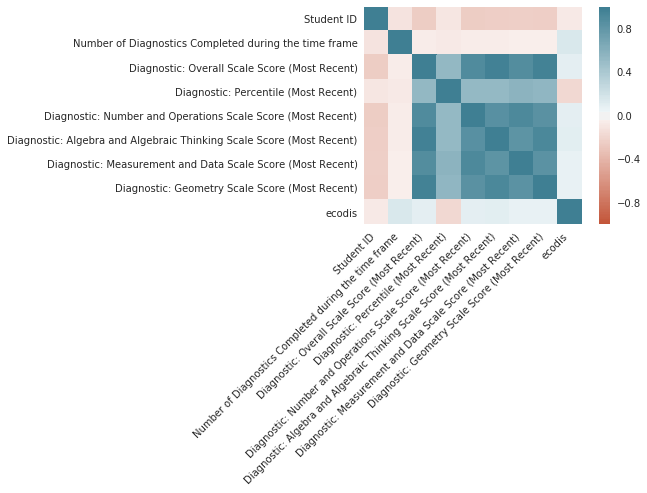

In [24]:
corr_math = xt1.corr()
ax = sns.heatmap(
    corr_math, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
xt1.isnull().sum()

df = xt1.copy()

for i in xt1.columns:
    print (i)


Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Performance level
Diagnostic: Number and Operations Scale Score (Most Recent)
Diagnostic: Number and Operations Placement (Most Recent)
Diagnostic: Number and Operations Relative Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent)
Diagnostic: Measurement and Data Scale Score (Most Recent)
Diagnostic: Measurement and Data Placement (Most Recent)
Diagnostic: Measurement and Data Relative Placement (Most Recent)
Diagnostic: Geometry Scale Score (Most Recent)
Diagnostic: Geometry Placement (Most Recent)
Diagnos

In [26]:
xt1.shape
df.shape

(2506, 29)

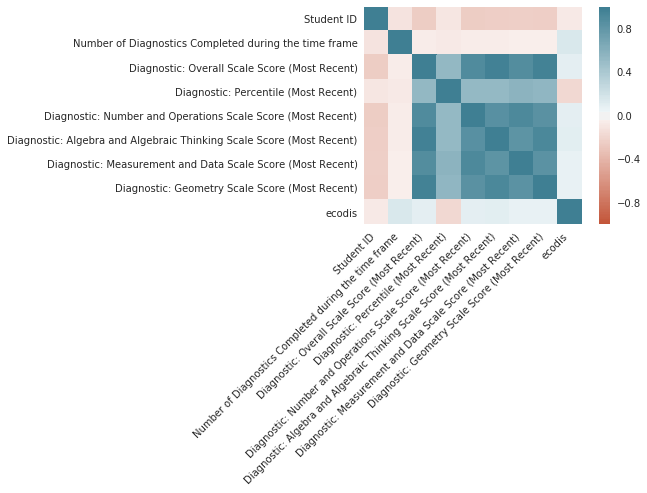

In [27]:
corr_math = df.corr()
ax = sns.heatmap(
    corr_math, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [28]:
dfmathready=xt1.copy()

In [29]:
dfmathready.isnull().sum()

Student ID                                                                     0
Student Grade                                                                  0
Academic Year                                                                  0
School                                                                         0
Subject                                                                        0
Gender                                                                         0
Hispanic or Latino                                                             0
English Language Learner                                                       0
Special Education                                                              0
Number of Diagnostics Completed during the time frame                          0
Diagnostic: Overall Scale Score (Most Recent)                                  0
Diagnostic: Overall Placement (Most Recent)                                    0
Diagnostic: Percentile (Most

In [31]:
#this means that the data is cleaned 
dfmathready.shape

(2506, 29)

In [30]:
for i in dfmathready.columns:
    print (i)

Student ID
Student Grade
Academic Year
School
Subject
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Scale Score (Most Recent)
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Performance level
Diagnostic: Number and Operations Scale Score (Most Recent)
Diagnostic: Number and Operations Placement (Most Recent)
Diagnostic: Number and Operations Relative Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent)
Diagnostic: Measurement and Data Scale Score (Most Recent)
Diagnostic: Measurement and Data Placement (Most Recent)
Diagnostic: Measurement and Data Relative Placement (Most Recent)
Diagnostic: Geometry Scale Score (Most Recent)
Diagnostic: Geometry Placement (Most Recent)
Diagnos

In [32]:
dfmathready_y = dfmathready.iloc[:,10].values

In [33]:
dfmathready_y

array([461., 510., 442., ..., 535., 461., 461.])

In [34]:
dfmathready_x=dfmathready.drop(['Student ID','Diagnostic: Overall Scale Score (Most Recent)','Academic Year','Subject'],axis=1)
print(dfmathready_x.shape) 

for i in dfmathready_x.columns:
    print(i)

(2506, 25)
Student Grade
School
Gender
Hispanic or Latino
English Language Learner
Special Education
Number of Diagnostics Completed during the time frame
Diagnostic: Overall Placement (Most Recent)
Diagnostic: Percentile (Most Recent)
Performance level
Diagnostic: Number and Operations Scale Score (Most Recent)
Diagnostic: Number and Operations Placement (Most Recent)
Diagnostic: Number and Operations Relative Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Placement (Most Recent)
Diagnostic: Algebra and Algebraic Thinking Relative Placement (Most Recent)
Diagnostic: Measurement and Data Scale Score (Most Recent)
Diagnostic: Measurement and Data Placement (Most Recent)
Diagnostic: Measurement and Data Relative Placement (Most Recent)
Diagnostic: Geometry Scale Score (Most Recent)
Diagnostic: Geometry Placement (Most Recent)
Diagnostic: Geometry Relative Placement (Most Recent)
Diagnostic: Rush Flag

In [35]:
dfmathready_x = pd.get_dummies(data=dfmathready_x, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(dfmathready_x, dfmathready_y, test_size=0.2, random_state= 0)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2004, 221)
(502, 221)
(2004,)
(502,)


In [37]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
  predicted = model.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':predicted})
df1 = df.head(25)
display(df1)

,Actual,Predicted
0,424.0,422.153300
1,461.0,460.920068
2,461.0,461.032327
3,424.0,424.465046
4,461.0,461.018954
5,446.0,444.918462
6,519.0,519.423665
7,411.0,410.943391
8,461.0,461.006916
9,484.0,484.343770


In [39]:
print(predicted)

[422.15330004 460.92006793 461.03232742 424.46504591 461.01895383
 444.91846208 519.42366503 410.94339067 461.00691568 484.34376954
 516.01031254 532.85189737 382.19589644 393.73208133 460.94772548
 388.76630467 462.4106626  436.1091702  460.97313722 460.86533212
 542.77469721 540.41238078 518.828326   482.80373409 434.35712884
 389.60649634 461.05435196 461.06057823 514.71985667 498.38615578
 375.98673324 463.67768858 547.84588883 366.91686908 466.28323758
 520.27267948 512.04767976 460.98341797 529.50974348 438.93437373
 370.84845338 528.93498195 373.99534268 461.07524192 461.05001692
 461.00275583 448.6703028  495.53489852 486.05726371 491.17426952
 411.58975368 461.07261638 536.73679844 496.90413338 447.11608136
 468.74767307 446.82935235 461.02028927 465.59506083 253.43013209
 419.83315053 530.78453945 546.72388337 350.13134644 509.16865979
 411.38030858 461.03232742 425.91400847 472.36121849 380.70835761
 538.77806459 461.00691568 538.27259726 460.77207924 446.61854683
 461.01479

In [48]:

xt1.to_excel("math_I_Ready_cleaned.xlsx",
             sheet_name='math_Mcas_cleaned'
           )

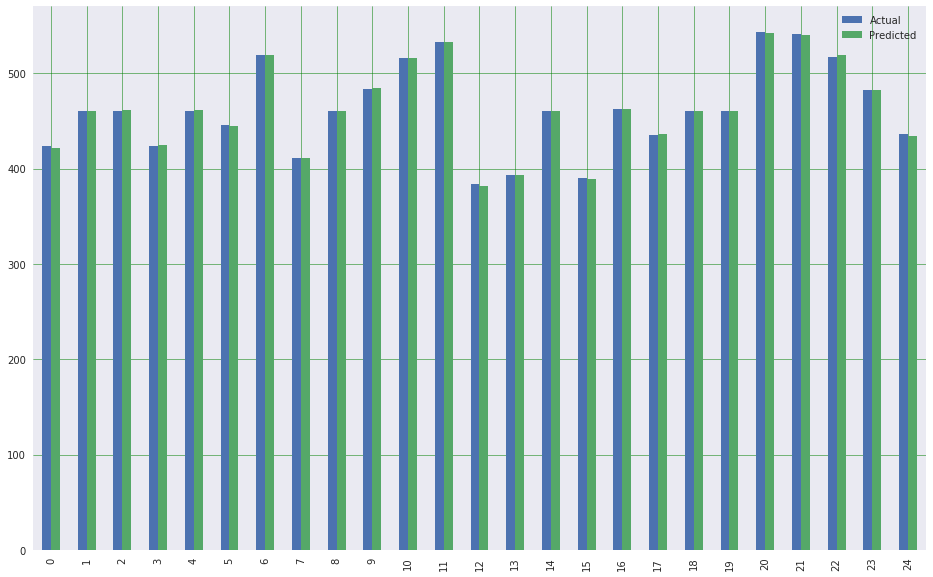

In [49]:
#as aobserved the model  performed a pretty good prediction indicating the overall scores meaning to say that the errror is  low 
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [50]:
coeff_df = pd.DataFrame(model.coef_, dfmathready_x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Number of Diagnostics Completed during the time frame,-1.270811
Diagnostic: Percentile (Most Recent),-0.014664
Diagnostic: Number and Operations Scale Score (Most Recent),0.309862
Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent),0.301170
Diagnostic: Measurement and Data Scale Score (Most Recent),0.189511
Diagnostic: Geometry Scale Score (Most Recent),0.228718
ecodis,0.100009
Student Grade_2,0.501872
Student Grade_3,0.528647
Student Grade_4,0.405702


this  means that there  is a higher chance of a pacific islander securing a better grade in math meaning to say that in case the test giver is a pacific islander there is a probabilit that  they will secure a 1.83 points higher on the test as  compared to other race kids 

In [51]:


print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

Mean Absolute Error: 0.6307492731768378
Mean Squared Error: 1.574650391953126
Root Mean Squared Error: 1.254850744890852


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


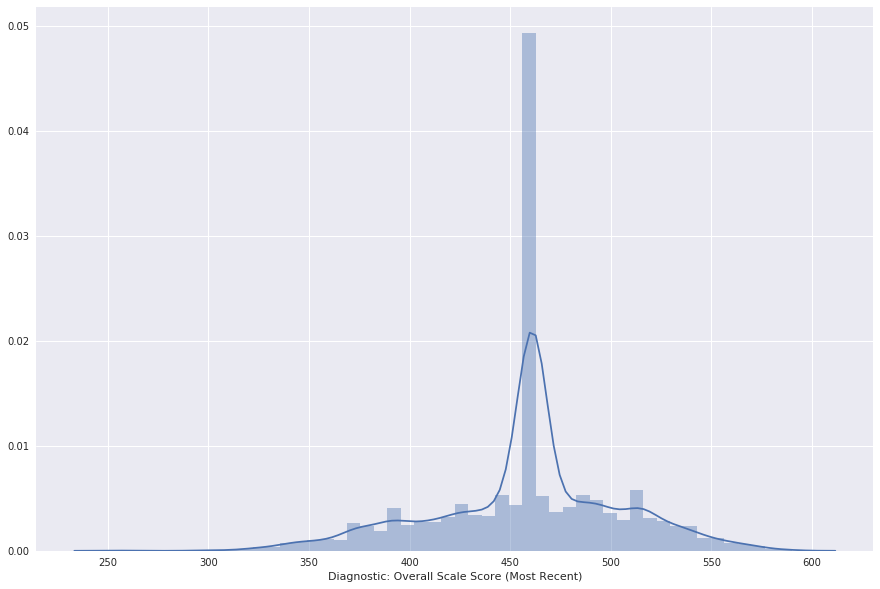

In [52]:
#finding out the distribution of the score it seems to  be a normal distribution and not skewed
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dfmathready['Diagnostic: Overall Scale Score (Most Recent)'])

In [53]:
dfmathready.describe()

,Student ID,Number of Diagnostics Completed during the time frame,Diagnostic: Overall Scale Score (Most Recent),Diagnostic: Percentile (Most Recent),Diagnostic: Number and Operations Scale Score (Most Recent),Diagnostic: Algebra and Algebraic Thinking Scale Score (Most Recent),Diagnostic: Measurement and Data Scale Score (Most Recent),Diagnostic: Geometry Scale Score (Most Recent),ecodis
count,2506.00000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,316352.87909,0.697127,458.520750,55.915004,450.969673,459.623304,453.578611,458.276536,0.189545
std,20974.72162,0.469050,46.141332,22.860847,43.244917,47.854789,43.964062,47.388307,0.392019
min,155002.00000,0.000000,255.000000,1.000000,278.000000,273.000000,239.000000,214.000000,0.000000
25%,303280.50000,0.000000,439.000000,47.000000,437.000000,439.000000,441.000000,436.000000,0.000000
50%,304942.50000,1.000000,461.000000,58.000000,453.000000,463.000000,455.000000,460.000000,0.000000
75%,350081.00000,1.000000,483.000000,67.000000,469.000000,485.000000,471.000000,482.000000,0.000000
max,351088.00000,2.000000,590.000000,99.000000,579.000000,595.000000,597.000000,610.000000,1.000000


In [54]:
#proceeding with a neural network in order to make  overall model prediction

#creating the test and train datasets

nn_df=pd.read_excel("math_I_Ready_cleaned.xlsx",sheetname="math_Mcas_cleaned")
nn_df.shape

(2506, 29)

In [56]:

df_y_math=nn_df.iloc[:,10].values
df_y_math
print(df_y_math.shape)

df_x_math=nn_df.drop(['Student ID','Diagnostic: Overall Scale Score (Most Recent)','Academic Year','Subject'],axis=1)
df_x_math
df_x_math.shape


(2506,)


(2506, 25)

In [57]:
df_x_math = pd.get_dummies(data=df_x_math, drop_first=True)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_x_math, df_y_math, test_size=0.2, random_state= 0)

number_of_columns=len(X_test1.columns)
print(X_test1.shape)

#creating the mdoel
model_nn=Sequential()
model_nn.add(Dense(50,input_dim=number_of_columns,activation="relu"))

model_nn.add(Dense(100,activation='relu'))

model_nn.add(Dense(50, activation='relu'))

model_nn.add(Dense(1, activation='linear'))
print(len(X_test1.columns))

(502, 221)
221


In [58]:
model_nn.compile(loss='mse',optimizer='adam')
print(X_train1.values)
model_nn.fit(X_train1.values,Y_train1,epochs=50,shuffle=True,verbose=2)

[[  1  16 417 ...   0   0   0]
 [  0  58 453 ...   0   0   1]
 [  0  58 453 ...   0   0   0]
 ...
 [  1  94 570 ...   0   0   1]
 [  1  13 473 ...   0   0   1]
 [  0  58 453 ...   0   0   1]]
Epoch 1/50
1s - loss: 20164.4271
Epoch 2/50
0s - loss: 68.9184
Epoch 3/50
0s - loss: 54.1156
Epoch 4/50
0s - loss: 50.8148
Epoch 5/50
0s - loss: 47.0613
Epoch 6/50
0s - loss: 44.3337
Epoch 7/50
0s - loss: 39.2881
Epoch 8/50
0s - loss: 35.5760
Epoch 9/50
0s - loss: 30.8980
Epoch 10/50
0s - loss: 28.7755
Epoch 11/50
0s - loss: 27.1669
Epoch 12/50
0s - loss: 22.5728
Epoch 13/50
0s - loss: 20.5571
Epoch 14/50
0s - loss: 20.6772
Epoch 15/50
0s - loss: 17.8474
Epoch 16/50
0s - loss: 16.6595
Epoch 17/50
0s - loss: 15.8184
Epoch 18/50
0s - loss: 14.9108
Epoch 19/50
0s - loss: 16.9409
Epoch 20/50
0s - loss: 13.8162
Epoch 21/50
0s - loss: 13.1248
Epoch 22/50
0s - loss: 13.1716
Epoch 23/50
0s - loss: 11.8551
Epoch 24/50
0s - loss: 11.0971
Epoch 25/50
0s - loss: 10.3390
Epoch 26/50
0s - loss: 10.1136
Epoch 27

In [60]:
test_error_rate=model_nn.evaluate(X_test1.values,Y_test1,verbose=0)

In [61]:
#the test error rate 
print(test_error_rate)

print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

2.8399168846616707
(2004, 221)
(502, 221)
(2004,)
(502,)


In [62]:
X_test1.shape

(502, 221)

In [64]:
#this reshaping will only work when you import array from numpy 
X_test1=array(X_test1).reshape(502,221)

print(Y_test1.shape)
predictnn=model_nn.predict(X_test1)
predictnn=array(predictnn).reshape(502,)
print(predictnn.shape)

(502,)
(502,)


In [65]:
df_n = pd.DataFrame({'Actual': Y_test1, 'Predicted':predictnn})
df_n = df_n.head(25)

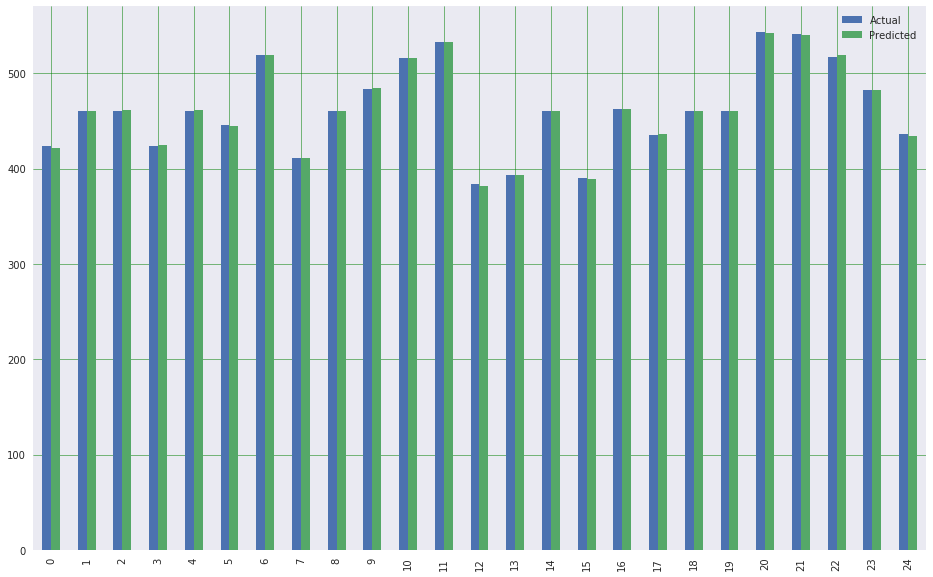

In [66]:
df_n = df.head(25)
df_n.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# checking how good the neural net model is as the actual and the predicted values are almost the same with a  test error rate of only 2.8